# 1. Introduction

This challenge comes from [2022 – WEEK 49: Can you make a pie chart?](https://workout-wednesday.com/wow2022w49/), which builds a interesting pie chart with a thin solid exterior with Segment labels on the outside. This design makes the pie chart more charming. Without further ado, let's do it!

First import some necessary libraries for the data manipulation and visualization.

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [8]:
data = pd.read_csv("./datasets/Superstore 2019.4.csv")
data["Sales"] = data["Sales"].str.replace(r"\$|,", "", regex=True).astype(int)
data.head()

,Profit Ratio,Category,City,Country/Region,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,...,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,16%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,...,Bush Somerset Collection Bookcase,$42,2,South,262,Consumer,11/11/2018,Second Class,Kentucky,Bookcases
1,30%,Furniture,Henderson,United States,Claire Gute,0%,1,11/8/2018,CA-2018-152156,42420.0,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$220,3,South,732,Consumer,11/11/2018,Second Class,Kentucky,Chairs
2,47%,Office Supplies,Los Angeles,United States,Darrin Van Huff,0%,1,6/12/2018,CA-2018-138688,90036.0,...,Self-Adhesive Address Labels for Typewriters b...,$7,2,West,15,Corporate,6/16/2018,Second Class,California,Labels
3,-40%,Furniture,Fort Lauderdale,United States,Sean O'Donnell,45%,1,10/11/2017,US-2017-108966,33311.0,...,Bretford CR4500 Series Slim Rectangular Table,-$383,5,South,958,Consumer,10/18/2017,Standard Class,Florida,Tables
4,11%,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,20%,1,10/11/2017,US-2017-108966,33311.0,...,Eldon Fold 'N Roll Cart System,$3,2,South,22,Consumer,10/18/2017,Standard Class,Florida,Storage


In [10]:
sales_per_segment = data.loc[:, ["Segment", "Sales"]].groupby(by="Segment").sum()
sales_per_segment

,Sales
Segment,
Consumer,1161497
Corporate,706183
Home Office,429674


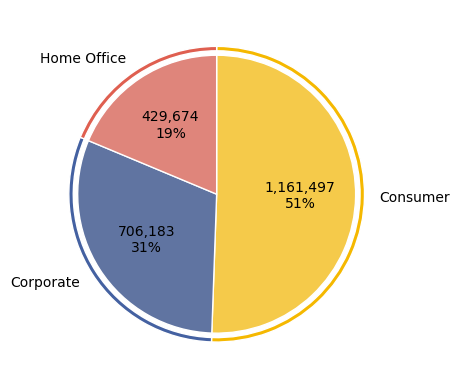

In [60]:
seg_colors = ["#F5B800", "#4461A1", "#DF5F50"]

# Change the saturation of seg_colors to 70% for the interior segments
rgb = mcolors.to_rgba_array(seg_colors)[:,:-1]
hsv = mcolors.rgb_to_hsv(rgb)
hsv[:,1] = 0.7 * hsv[:, 1]
interior_colors = mcolors.hsv_to_rgb(hsv)

def format_fun(x):
    seg = x * sales_per_segment['Sales'].sum() / 100
    return f"{seg:,.0f}\n{x:.0f}%"

fig, ax = plt.subplots()

width = 0.03
ax.pie(sales_per_segment['Sales'],  colors=seg_colors,
       labels=sales_per_segment.index,
       wedgeprops=dict(edgecolor="w", width=width), radius=1,
       startangle=90, counterclock=False)
ax.pie(sales_per_segment['Sales'], colors=interior_colors,
       autopct=format_fun, 
       wedgeprops=dict(edgecolor="w"), radius=1-2*width,
       startangle=90, counterclock=False)

# fig.savefig("wow2022w49_A_pie_chart.jpg", bbox_inches="tight", dpi=300)